In [34]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

## Часть 1. EDA

### Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [35]:
data = pd.read_csv('kNN_data.csv')

In [36]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [38]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Столбец `Unnamed: 32` лишний.

In [39]:
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na > 0].index.tolist()
list_to_drop

['Unnamed: 32']

In [40]:
data.drop(list_to_drop, axis=1, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [44]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.

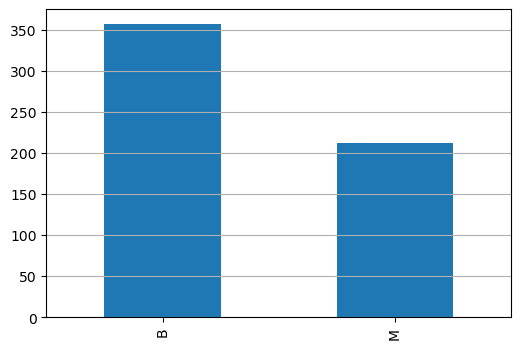

In [42]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')

In [43]:
data['diagnosis'] = pd.Categorical(data['diagnosis'])
data.drop(columns=['id'], inplace=True)

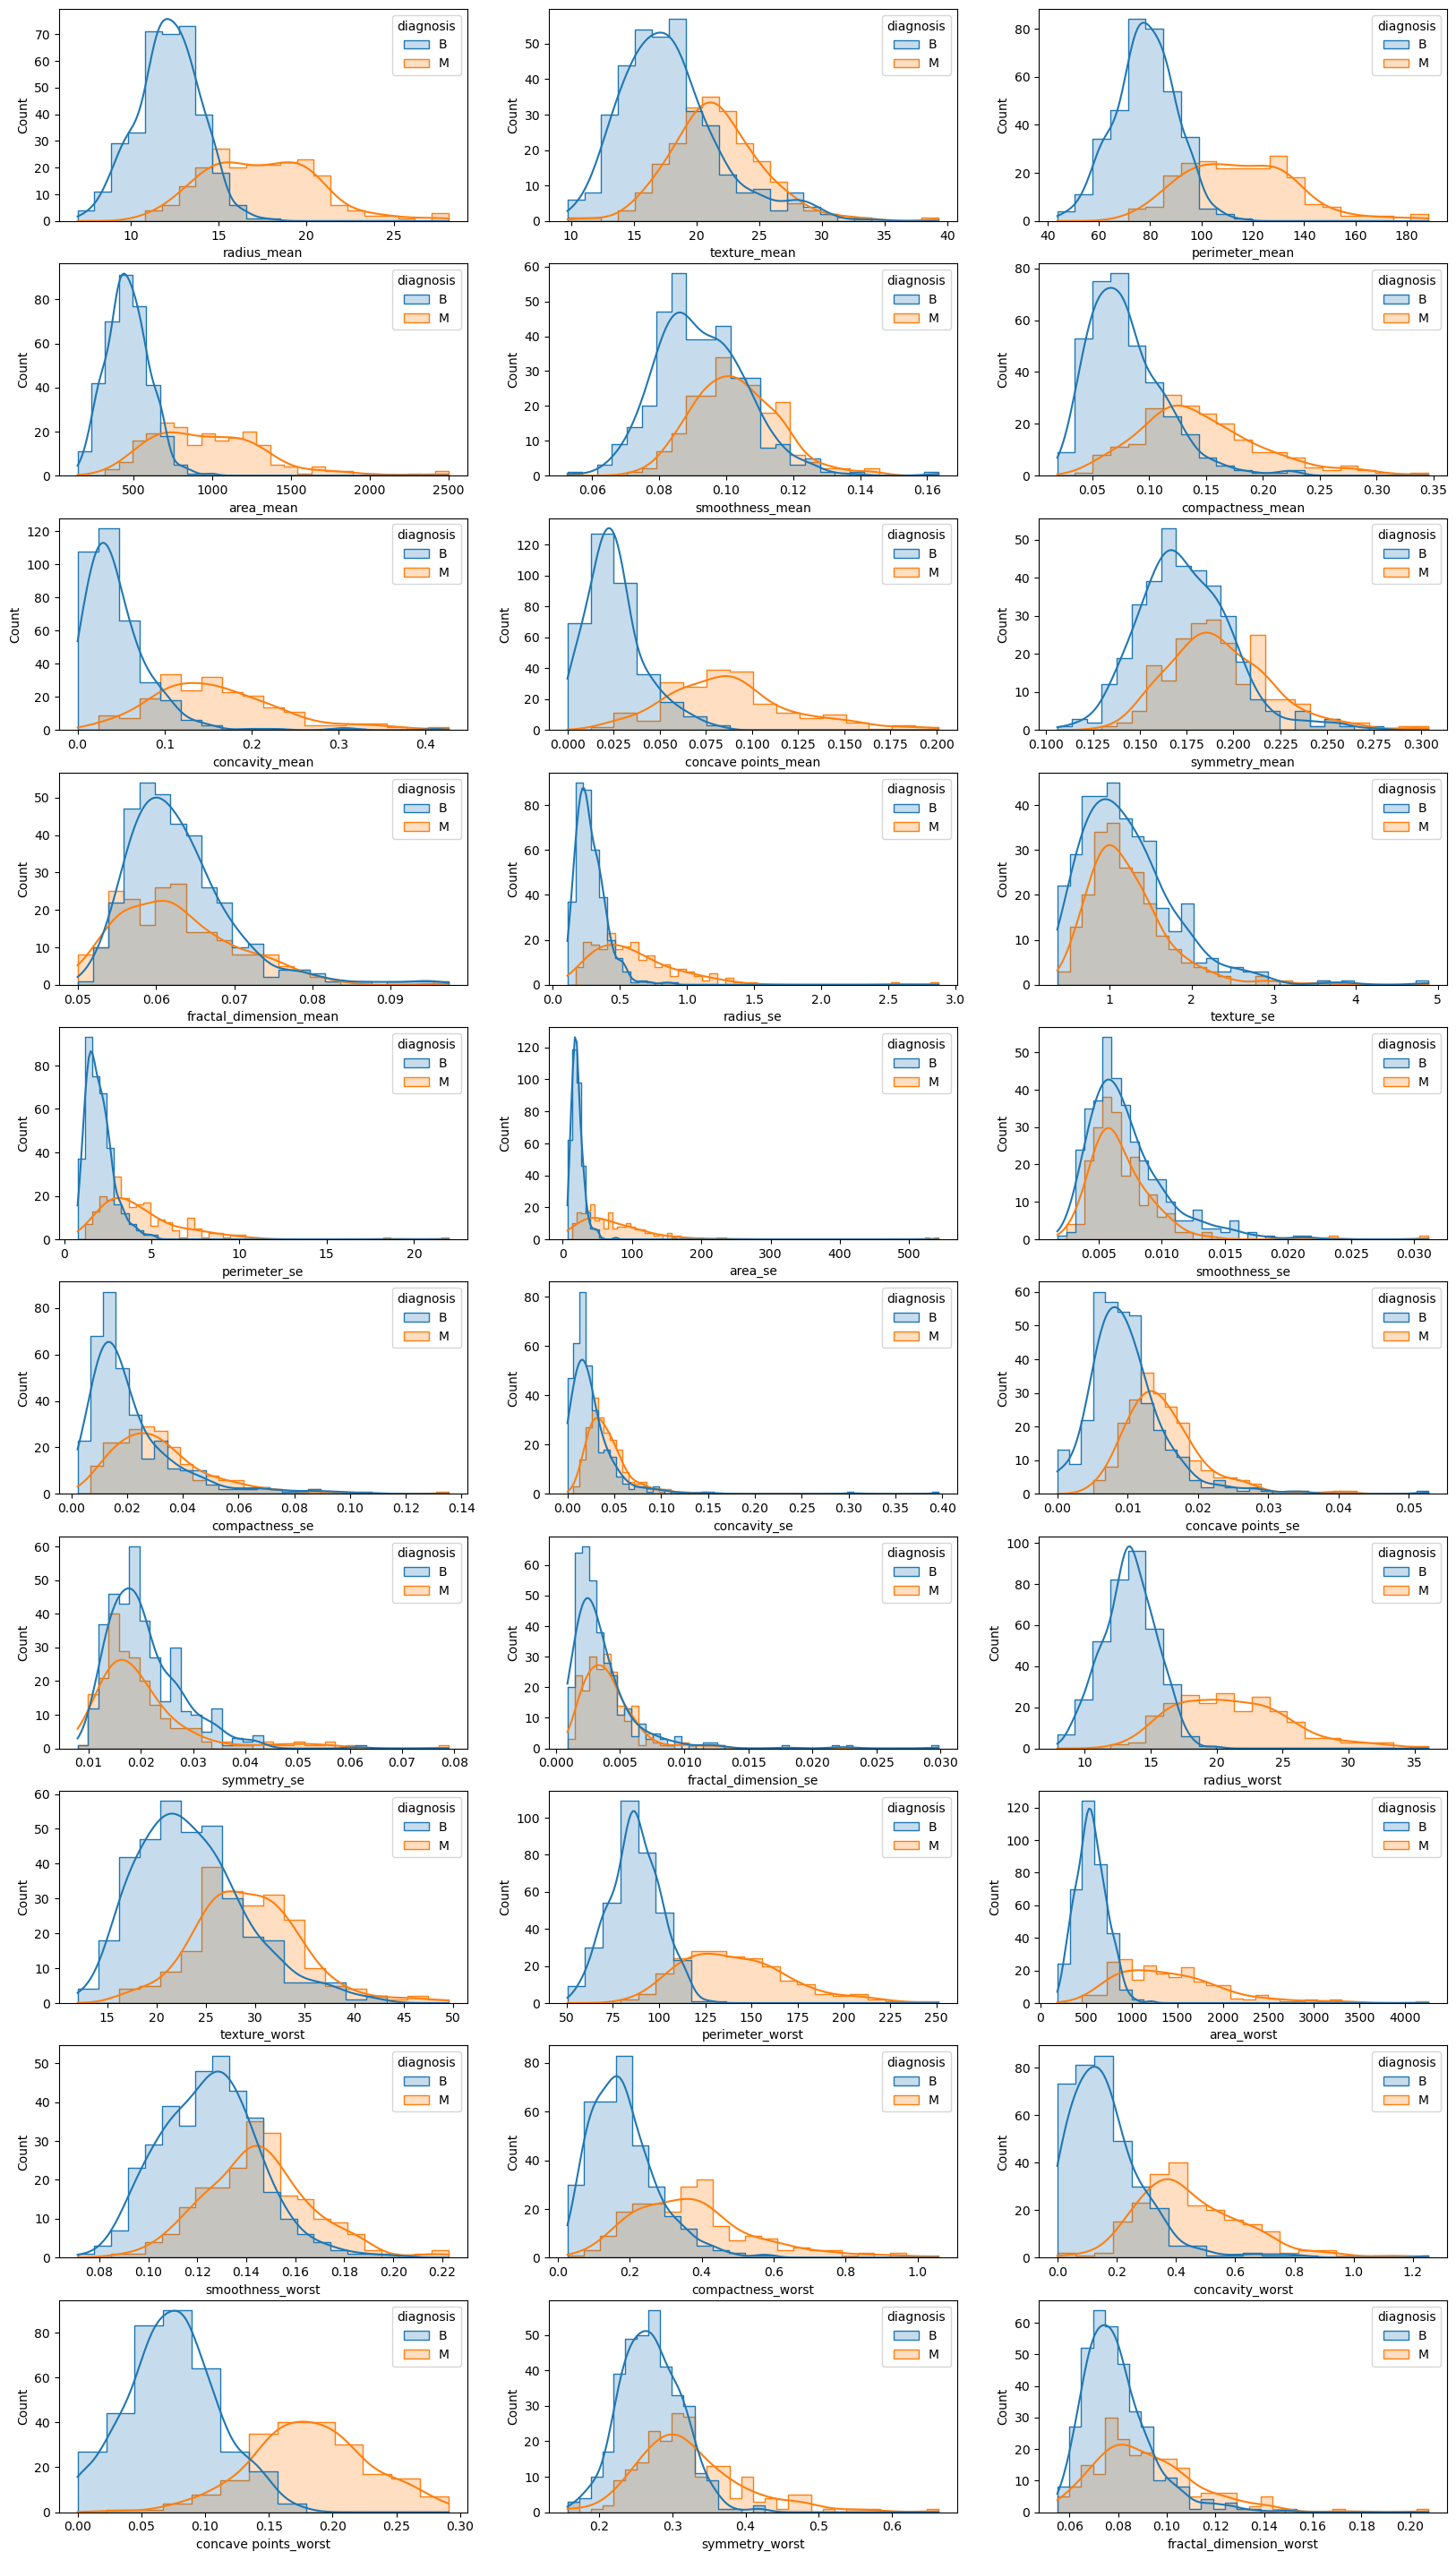

In [12]:
def plot_hists(data, x_size, hue):
    column_count = len(data.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1
        
    figure = plt.figure(figsize=(20, 40))

    for index, column in enumerate(data.drop(columns=hue), start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.histplot(data, ax=ax, x=column, hue=hue, element="step", kde=True)

plot_hists(data, x_size=3, hue="diagnosis")

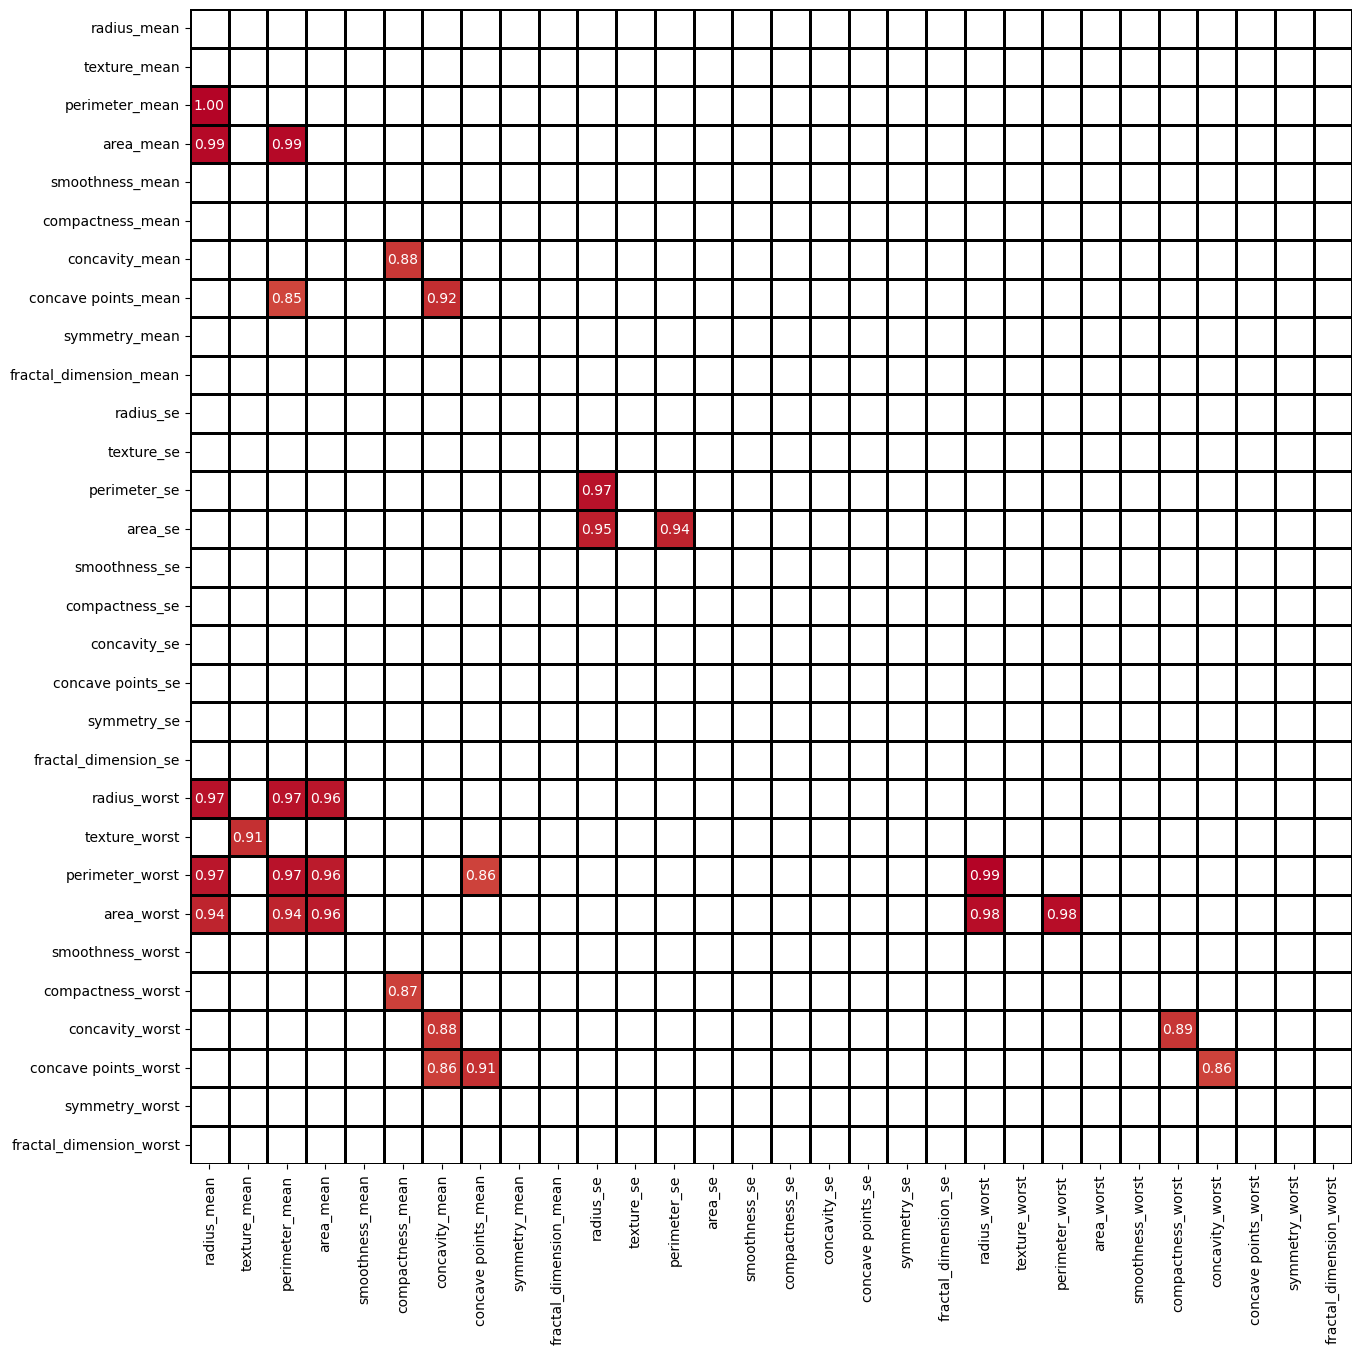

In [53]:
corr_edge = 0.85

corr_matrix = data.corr()
mask_matrix = (np.tril(corr_matrix, -1) < corr_edge) & (np.tril(corr_matrix, -1) > -corr_edge)

plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True,cbar=False, fmt='.2f', vmin=-1, vmax=1, center=0, mask=mask_matrix, linewidth=1, 
            linecolor='black', cmap='coolwarm')
plt.show()

Сильная корреляция присутствует между признаками:

`radius_mean` : perimeter_mean, area_mean, radius_worst, perimeter_worst, area_worst

`texture_mean` : texture_worst,

`perimeter_mean` : area_mean, concave_points_mean, radius_worst, perimeter_worst, area_worst

`area_mean` : radius_worst, perimeter_worst, area_worst

`compactness_mean` : concavity_mean, compactness_worst

`concavity_mean` : concave points_mean, concavity_worst, concave points_worst

`concave points_mean` : perimeter_worst, concave_points_worst

`radius_se` : perimeter_se, area_se

`perimeter_se` : area_se

`radius_worst` : perimeter_worst, area_worst

`perimeter_worst` : area_worst

`compactness_worst` : concavity_worst

`concavity_worst` : concave points_worst

#### Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

In [54]:
def strong_corr_pairs(matrix, edge):
    result = []

    strong_corr_matrix = matrix[(matrix > edge) | (matrix < -edge)]
    columns = strong_corr_matrix.columns

    for row in columns:
        for column in columns[::-1]:
            if row == column:
                break

            if not np.isnan(strong_corr_matrix[row][column]):
                result.append((row, column))

    return result

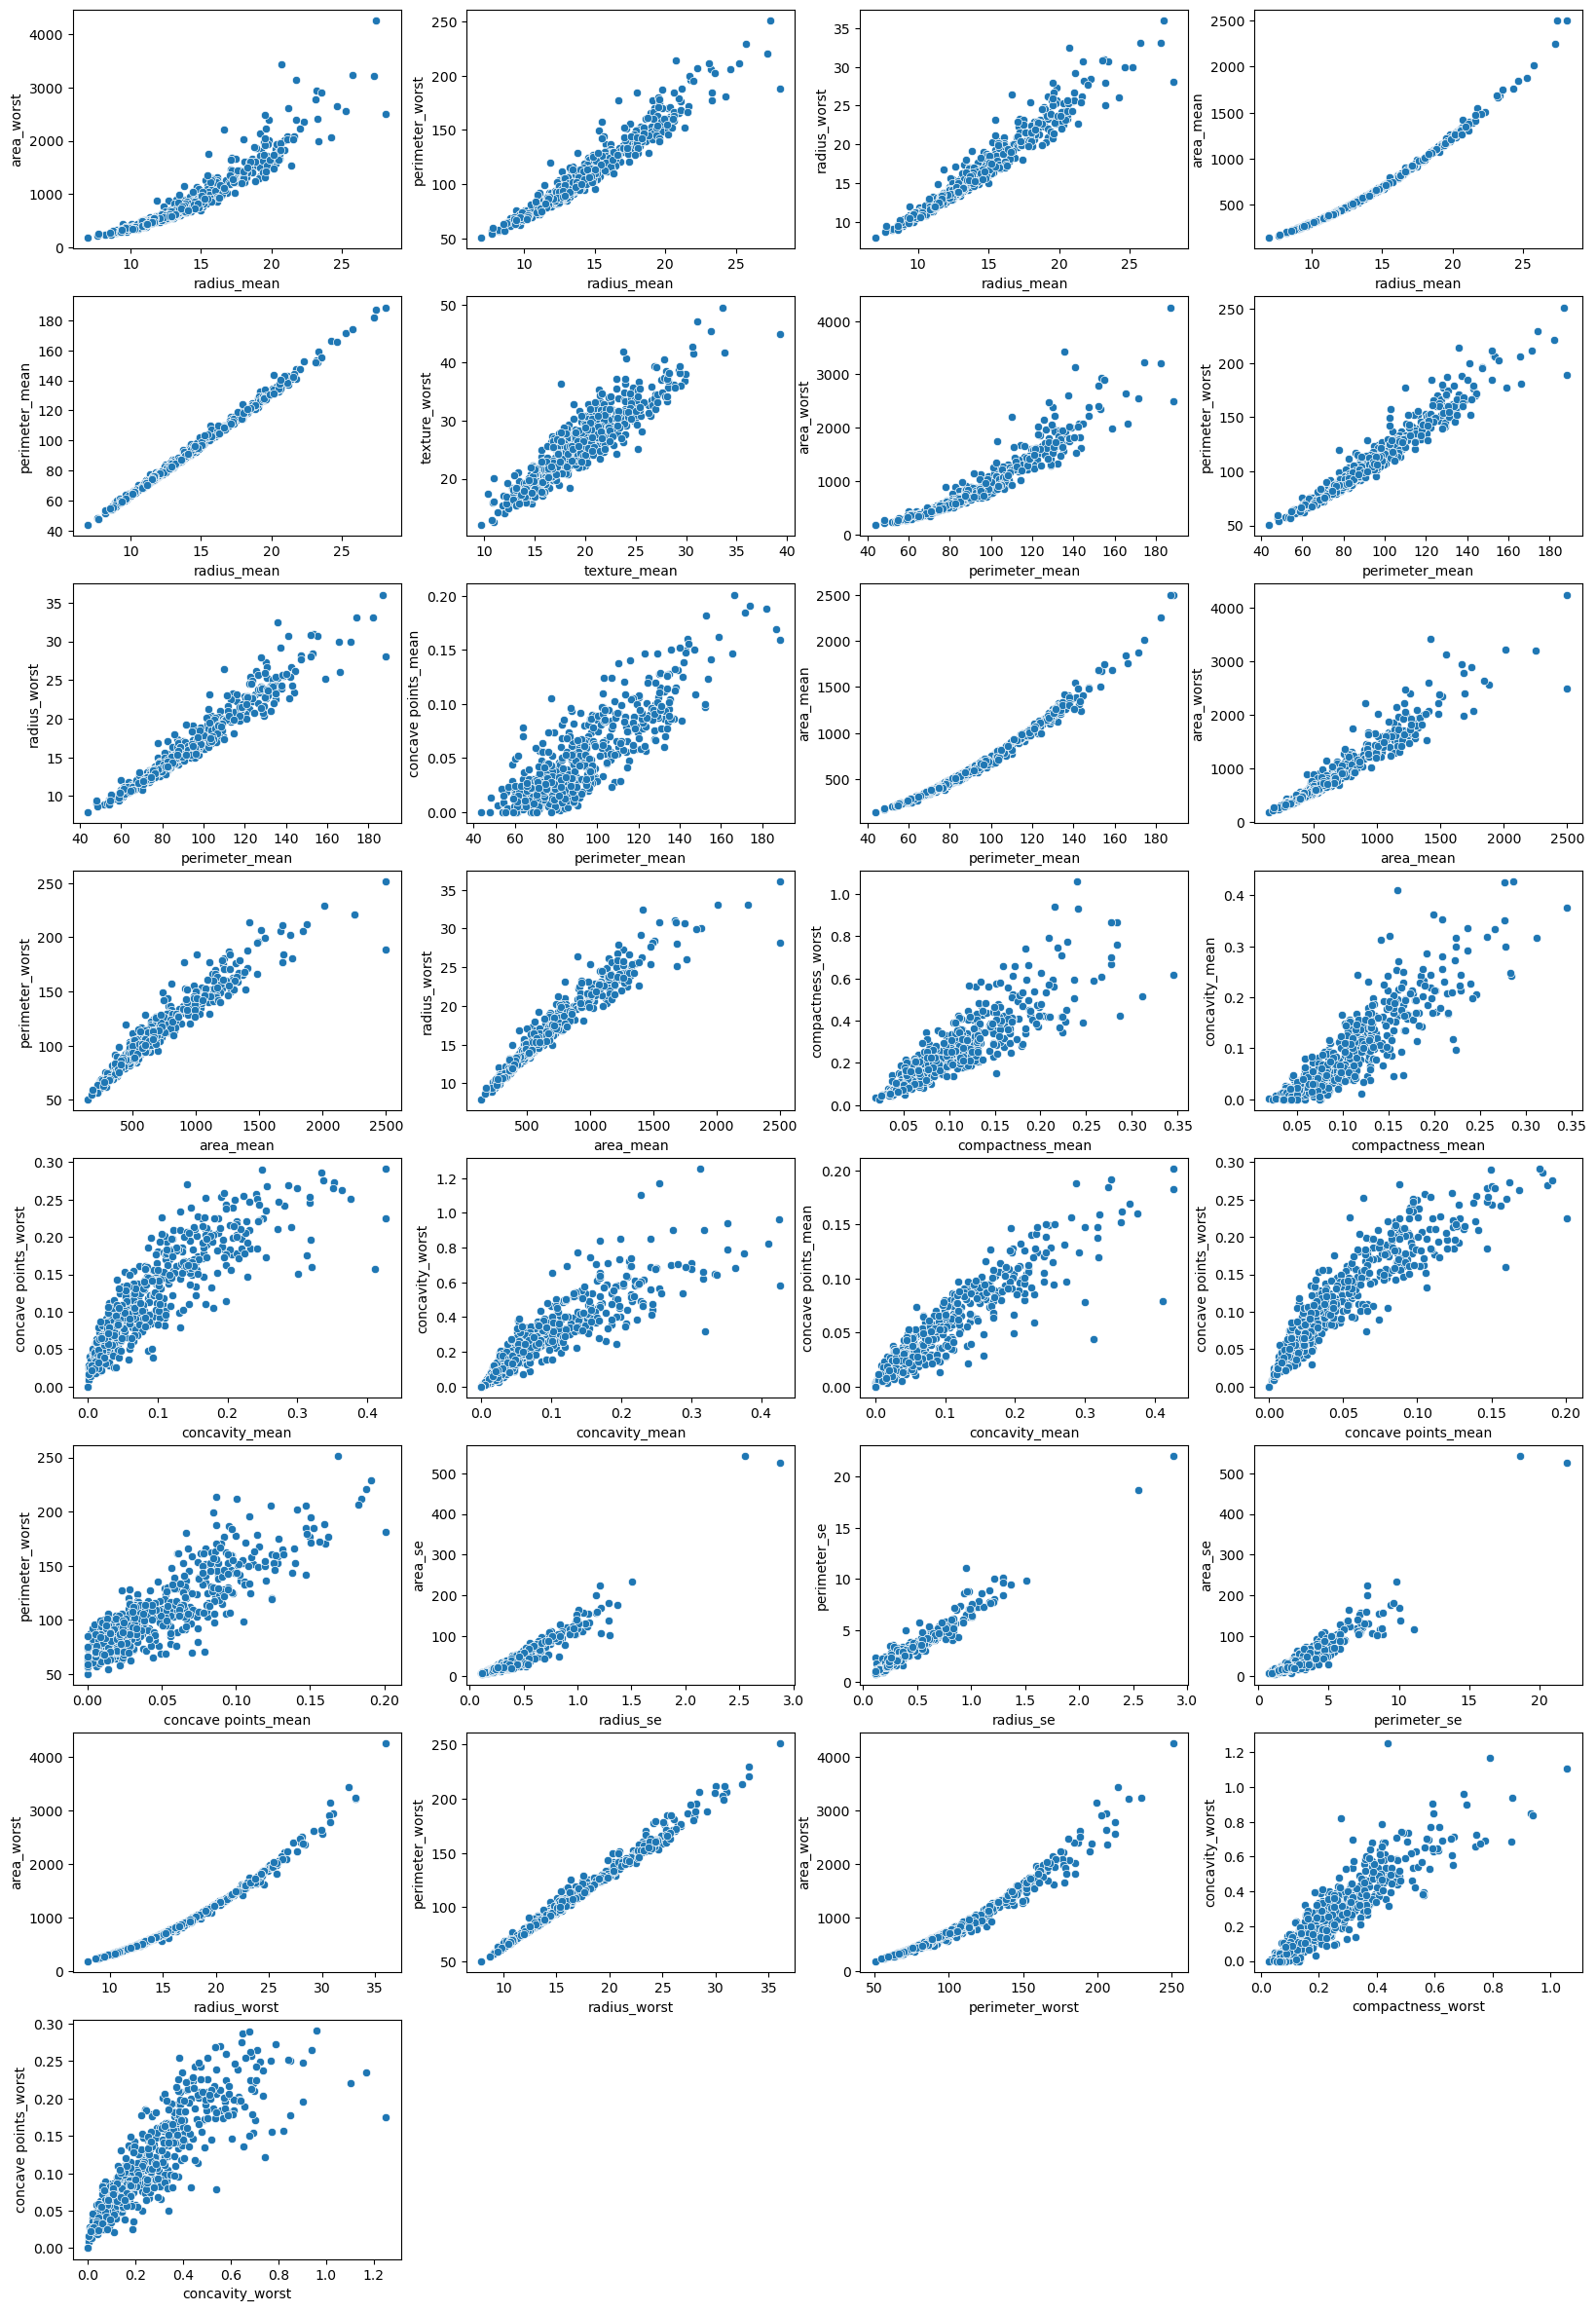

In [55]:
def plot_scatters(data, x_size, pairs):
    column_count = len(pairs)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, pair in enumerate(pairs, start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.scatterplot(data=data, ax=ax, x=data[pair[0]], y=data[pair[1]])

plot_scatters(data, x_size=4, pairs=strong_corr_pairs(corr_matrix, corr_edge))

Да, наблюдается линейная зависимость между сильно скоррелированными признаками.

#### Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных. Также очень приветствуется ваша инициатива по визуализациям и исследовании данных :)

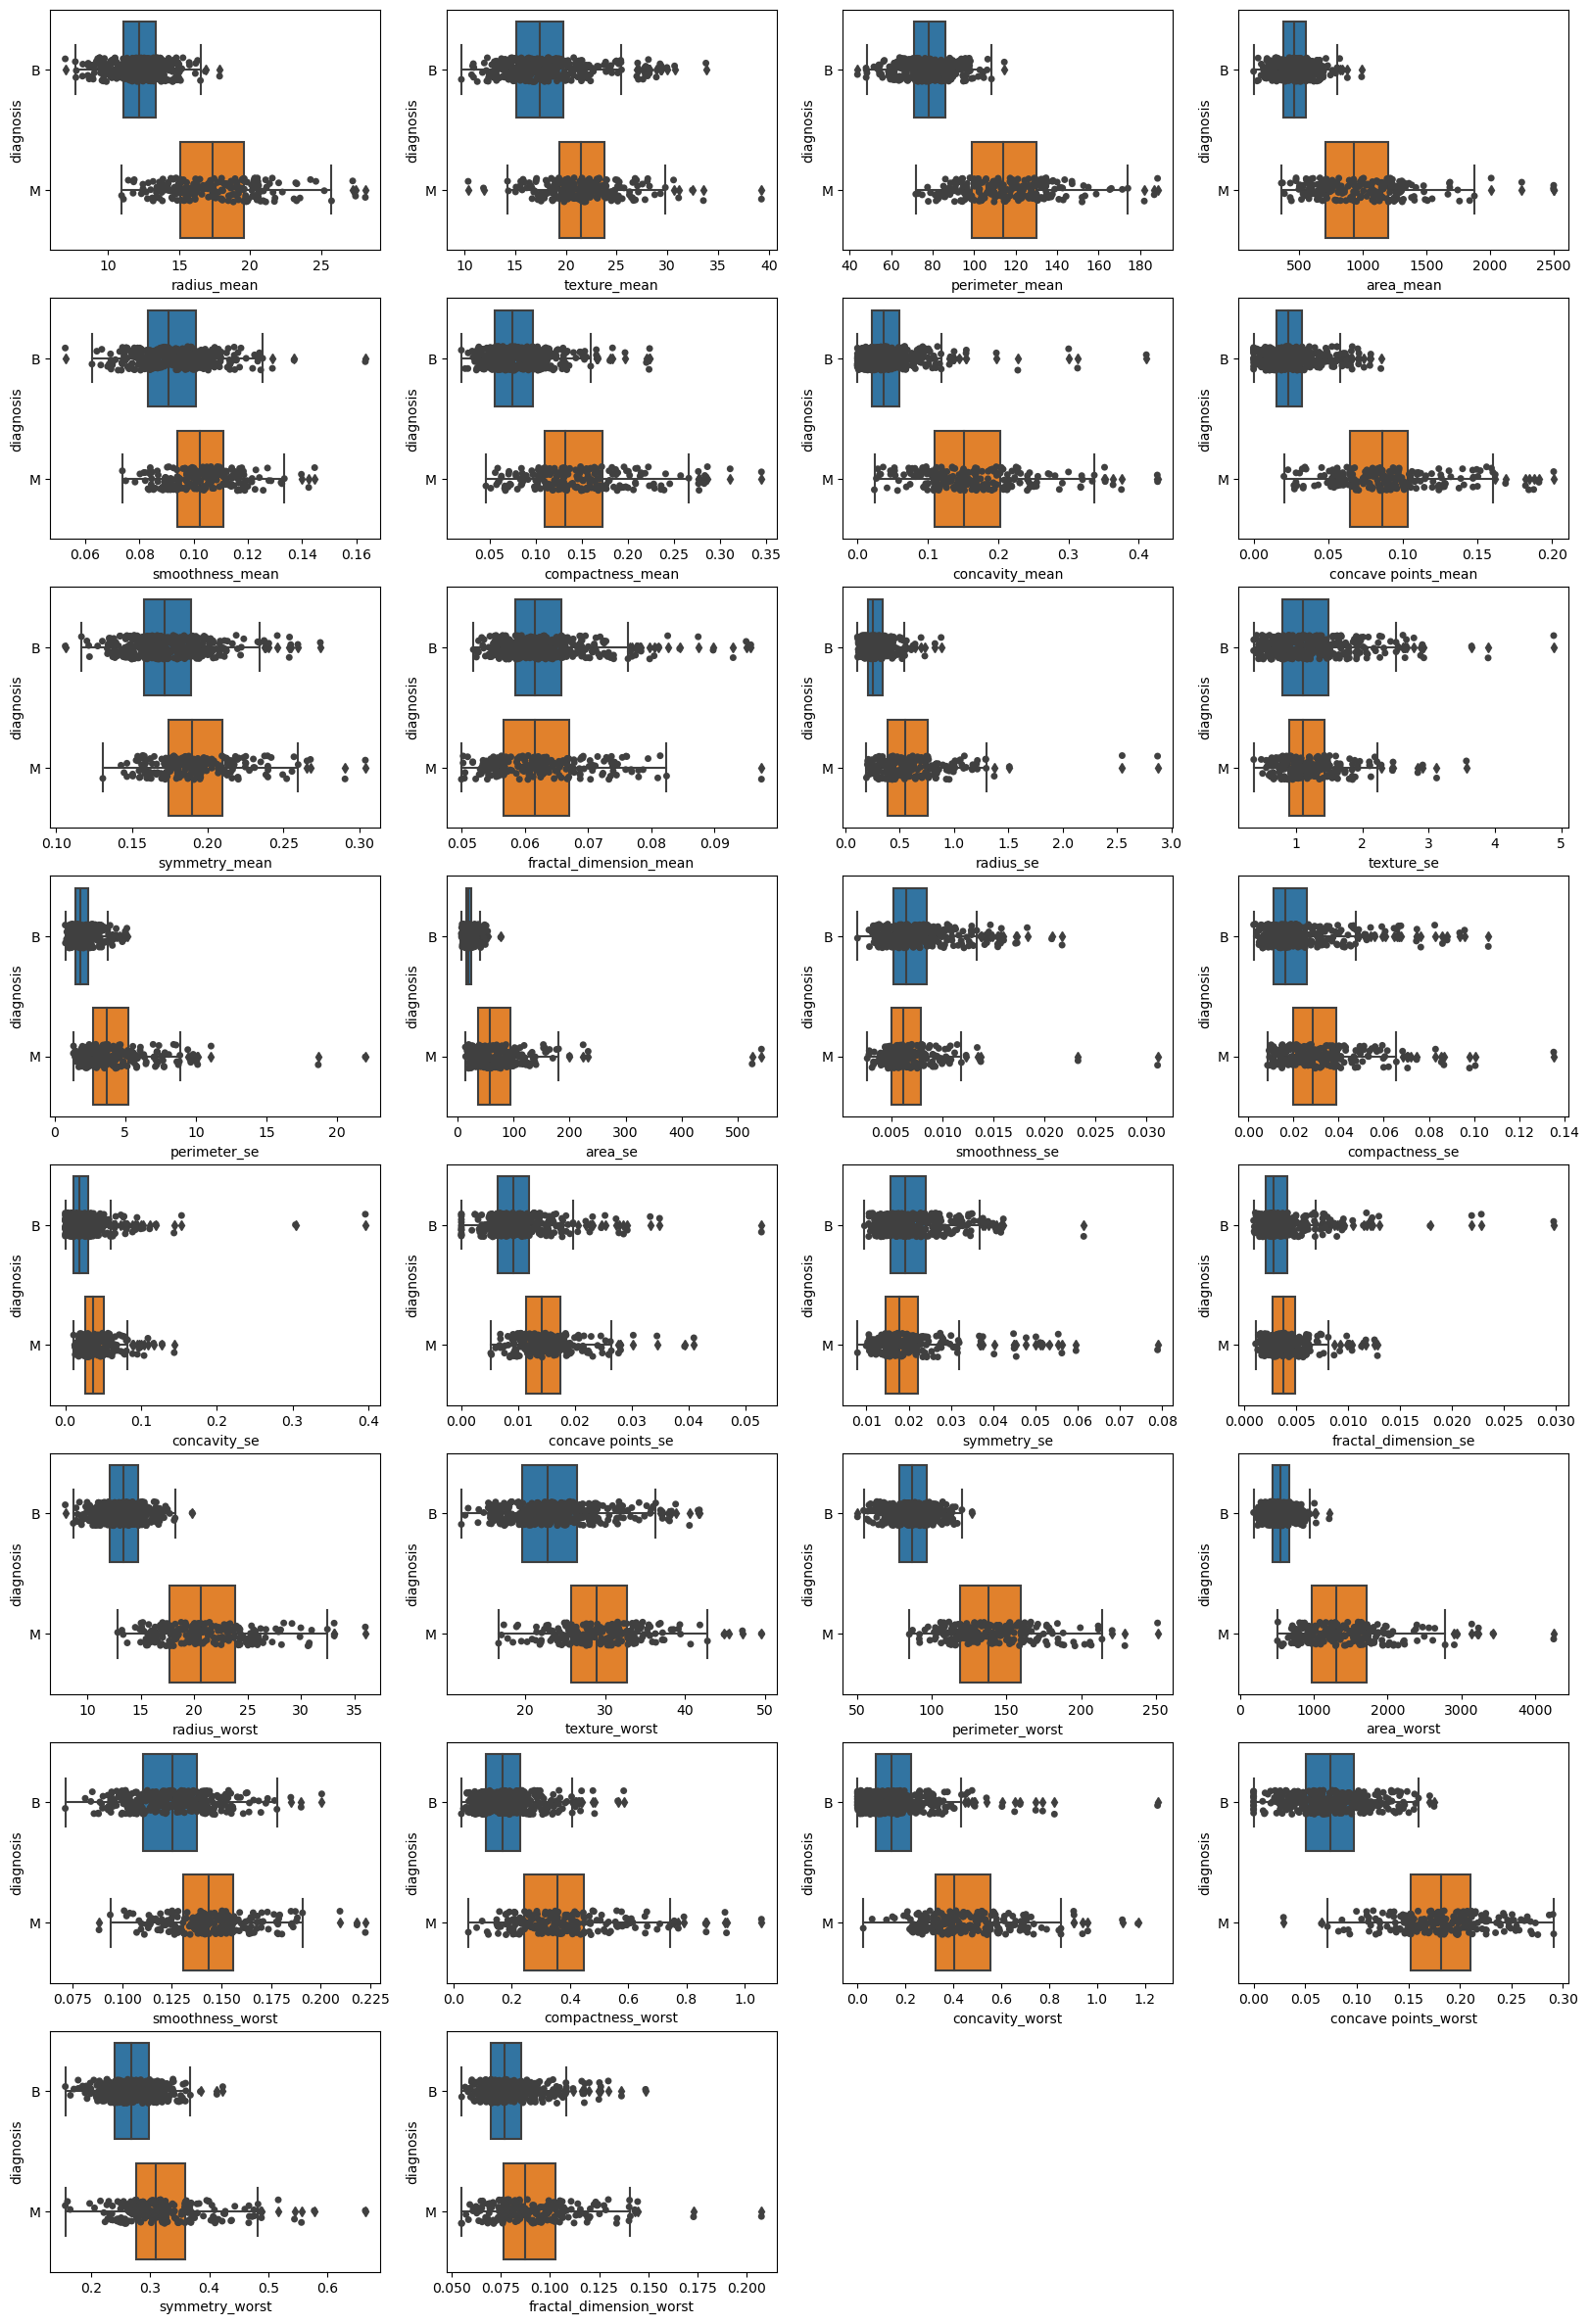

In [56]:
def plot_boxes(data, x_size, group_by):
    column_count = len(data.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(data.drop(columns=group_by), start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.boxplot(data=data, ax=ax, x=column, y=group_by)
        sns.stripplot(data=data, ax=ax, x=column, y=group_by, color=".25")
        
plot_boxes(data, x_size=4, group_by="diagnosis")

Наиболее удобно было бы отделить злокачественные новообразования от доброкачественных по признакам, где нет пересечений ящиков IQR.

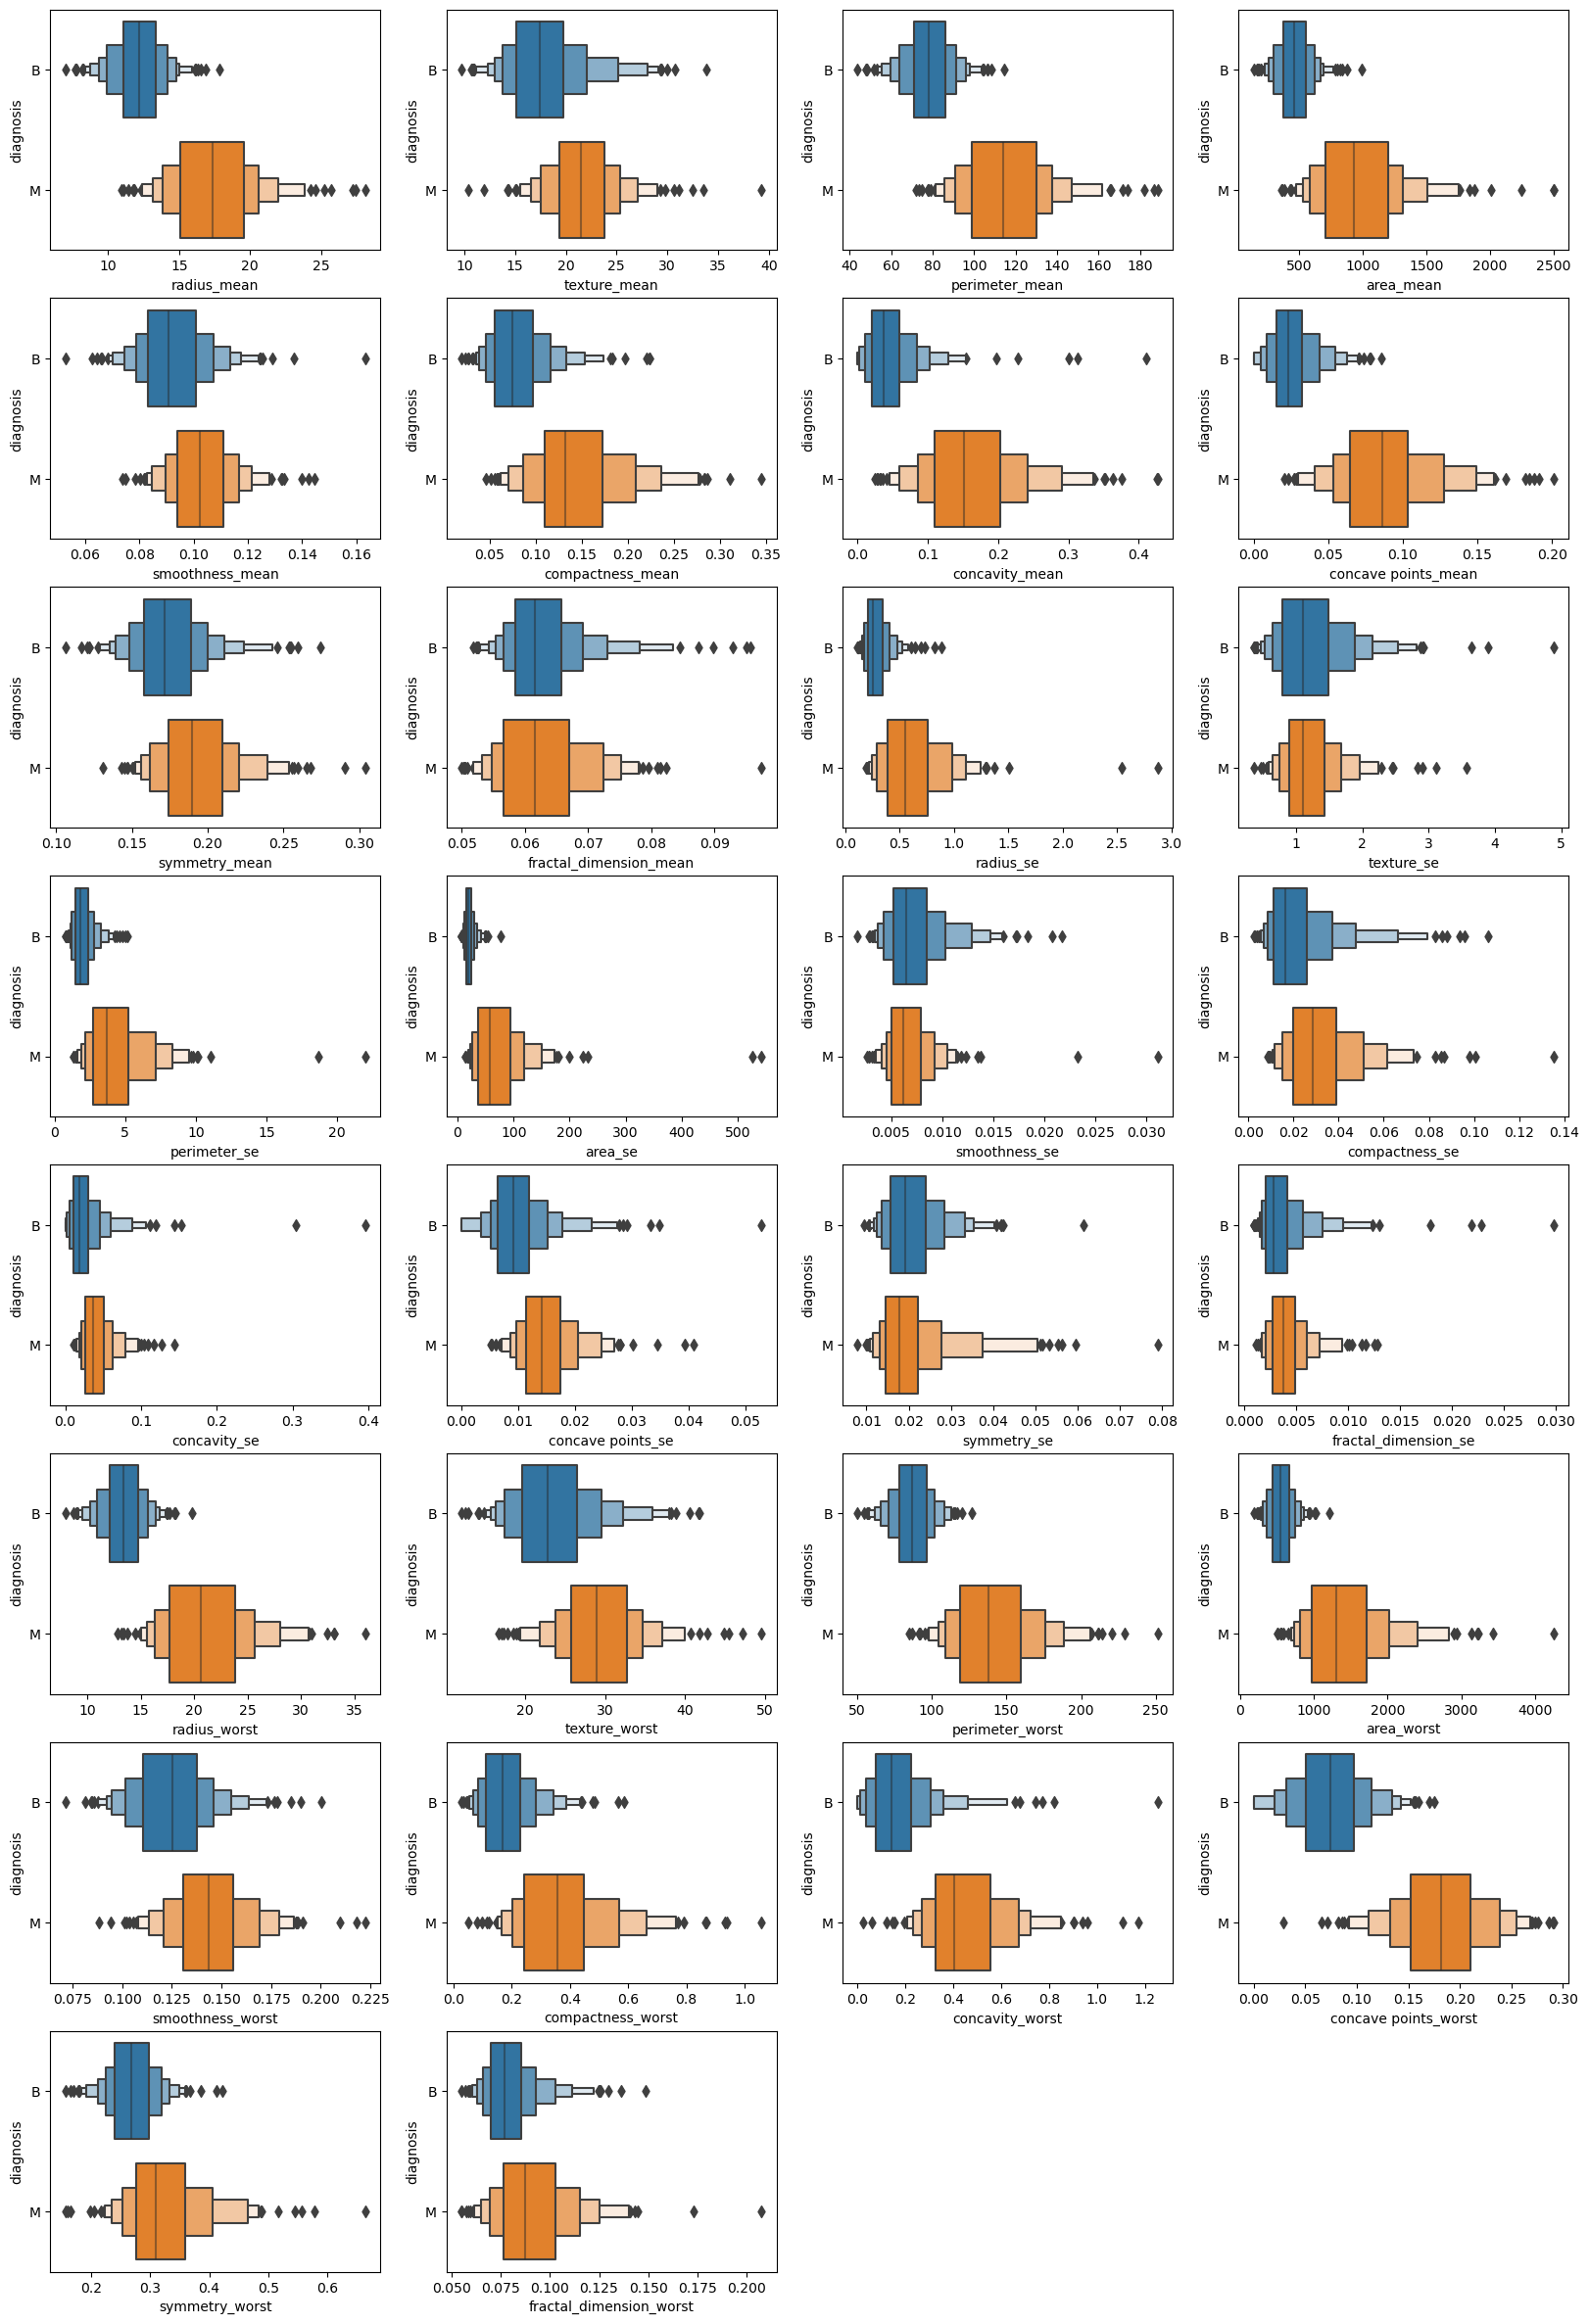

In [57]:
def plot_boxens(data, x_size, group_by):
    column_count = len(data.columns)
    line_counts = column_count // x_size

    if column_count % x_size:
        line_counts += 1

    figure = plt.figure(figsize=(20, 30))

    for index, column in enumerate(data.drop(columns=group_by), start=1):
        ax = figure.add_subplot(line_counts, x_size, index)
        sns.boxenplot(data=data, ax=ax, x=column, y=group_by)
        
plot_boxens(data, x_size=4, group_by="diagnosis")

## Часть 2. Моделирование при помощи kNN

#### Разбейте данные на train-test, отложив 30% выборки для тестирования.
#### Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

In [58]:
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# train-test split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='diagnosis'), data['diagnosis'], 
test_size=0.3, random_state=42)

# стандартизируем
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((398, 30), (171, 30), (398,), (171,))

Необходимо привести все переменные к одному масштабу, так как признаки имеют различные единицы измерений.

#### Постройте модель kNN "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

def quality(prediction, true):
    accuracy = accuracy_score(prediction, true)
    precision = precision_score(prediction, true)
    recall = recall_score(prediction, true)
    f1 = f1_score(prediction, true)
    print('Accuracy:{:.3f}\nPrecision:{:.3f}\nRecall:{:.3f}\nF1-score:{:.3f}'.format(accuracy, precision, recall, f1))

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Train quality:')
quality(knn.predict(X_train), y_train)
print('\nTest quality:')
y_pred = knn.predict(X_test)
quality(y_pred, y_test)

Train quality:
Accuracy:0.977
Precision:0.940
Recall:1.000
F1-score:0.969

Test quality:
Accuracy:0.959
Precision:0.937
Recall:0.952
F1-score:0.944


ROC-AUC  0.954


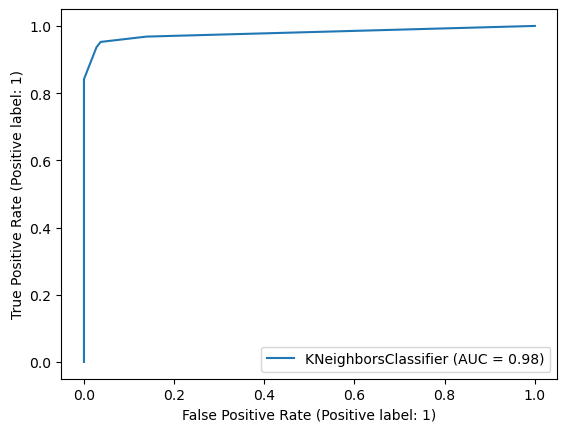

In [62]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

plot_roc_curve(knn, X_test, y_test)

print('ROC-AUC ', round(roc_auc_score(y_test, knn.predict(X_test)), 3))

#### Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)

test_predictions = grid_search.best_estimator_.predict(X_test)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best CV score: 0.954, best CV k: 5
Resulting test score: 0.935


Лучше не стало))

## Бонусное задание для любопытствующих, к которому можно вернуться после изучения логистической регрессии:


#### Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция Пирсона между которыми превышает 0.85.

In [71]:
def strong_corr_characters(data, edge):
    result = []
    orr_matrix = data.corr()
    strong_corr_matrix = corr_matrix[(corr_matrix > edge) | (corr_matrix < -edge)]
    columns = strong_corr_matrix.columns

    for row in columns:
        for column in columns:
            if not row == column and not np.isnan(strong_corr_matrix[row][column]):
                result.append(column)

    result = list(set(result))
    result.sort()
    return result

data = data.drop(columns=strong_corr_characters(data, edge=0.85))

#### Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

In [74]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="diagnosis"), data["diagnosis"], test_size=0.30, random_state=555)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print("Train quality:")
quality(log_reg.predict(X_train), y_train)

print("\nTest quality:")
quality(log_reg.predict(X_test), y_test)

Train quality:
Accuracy:0.912
Precision:0.869
Recall:0.887
F1-score:0.878

Test quality:
Accuracy:0.889
Precision:0.791
Recall:0.914
F1-score:0.848


ROC-AUC  0.87


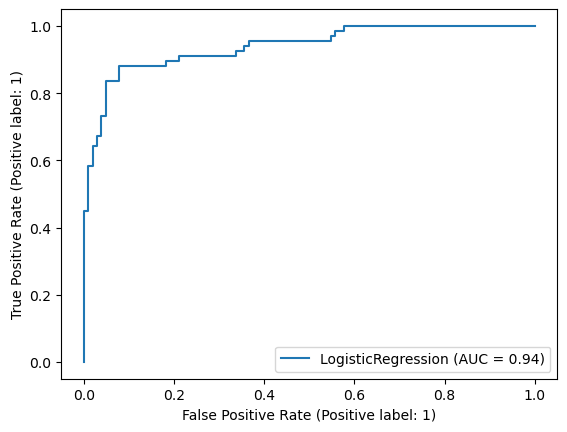

In [76]:
plot_roc_curve(log_reg, X_test, y_test)

print('ROC-AUC ', round(roc_auc_score(y_test, log_reg.predict(X_test)), 2))

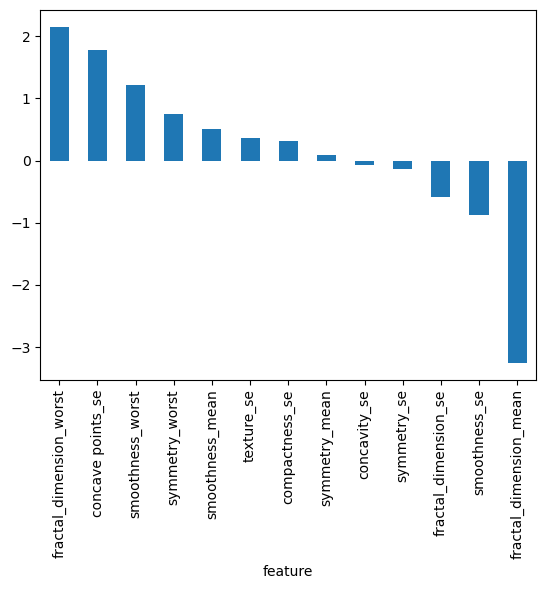

In [77]:
featureImportance = pd.DataFrame({
    "feature": data.drop(columns='diagnosis').columns,
    "importance": log_reg.coef_[0]
})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

#### Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)

In [79]:
from sklearn.linear_model import LogisticRegressionCV

log_reg = LogisticRegressionCV(Cs=range(1, 100))
log_reg.fit(X_train, y_train)

print("Train quality:")
quality(log_reg.predict(X_train), y_train)
print("\nTest quality:")
quality(log_reg.predict(X_test), y_test)

print("\nBest C value: ", log_reg.C_[0])

Train quality:
Accuracy:0.920
Precision:0.876
Recall:0.901
F1-score:0.888

Test quality:
Accuracy:0.889
Precision:0.806
Recall:0.900
F1-score:0.850

Best C value:  2


ROC-AUC  0.87


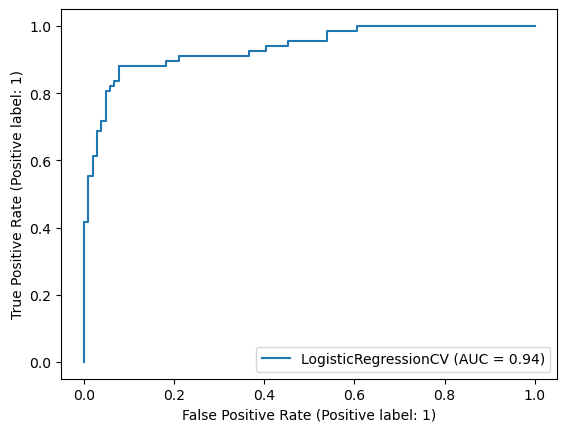

In [80]:
plot_roc_curve(log_reg, X_test, y_test)

print('ROC-AUC ', round(roc_auc_score(y_test, log_reg.predict(X_test)), 2))

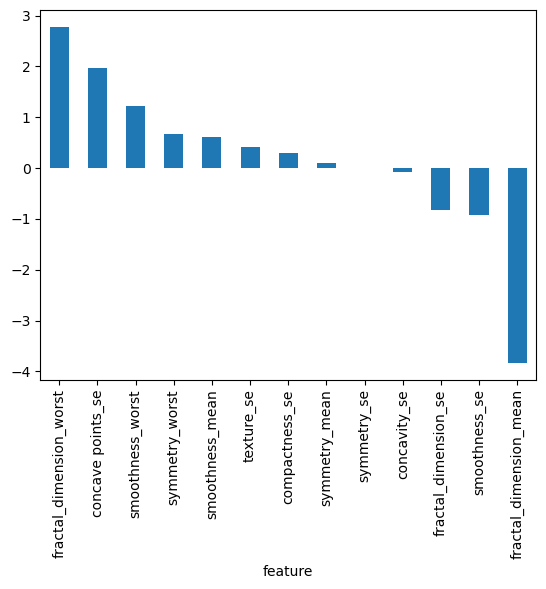

In [81]:
featureImportance = pd.DataFrame({"feature": data.drop(columns='diagnosis').columns,
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot.bar();

Настройка параметра С изменил коэффециеты при признаках. Модель существенно не изменилась. Признак `symmetry_se` не учитывается при лучшем С.

#### Какая из двух настроенных моделей, kNN или логистическая регрессия оказалась, в итоге, лучше?

Модель kNN оказалась лучше.